In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
import matplotlib as plt
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
from PIL import Image
import requests
from io import BytesIO


2021년 1월 31일 광고가 끝나는 ad_set 기준

In [20]:
q = """
SELECT a.id AS ad_set_id,
       a.total_budget,
       a.total_point,
       a.uid,
       to_date(a.start_at, 'YYYY-mm-dd') AS ad_set_start_date,
       b.pid,
       c.keyword,
       c.bid_price
FROM service1_quicket.ad_set a
JOIN service1_quicket.ad_set_product b ON a.id = b.ad_set_id
JOIN service1_quicket.ad_set_product_bid_keyword c ON b.id = c.ad_set_product_id
WHERE a.status NOT IN (2,
                       6)
  AND a.end_at BETWEEN '2021-01-31 00:00:00' AND '2021-01-31 23:59:59'
"""
dw = pd.read_sql(q, con=bun_dw)

In [12]:
dw.to_csv('dw.csv', index=False)

In [16]:
dw['ad_set_id'].nunique()

588

In [40]:
dw['ad_set_start_date'] = dw['ad_set_start_date'].astype(str)
dw.head()

,ad_set_id,total_budget,total_point,uid,ad_set_start_date,pid,keyword,bid_price
0,30958,50000,50000,5219206,2021-01-07,101492109,아디다스,605
1,30958,50000,50000,5219206,2021-01-07,101492109,라코스테,605
2,31360,17000,3500,7656805,2021-01-15,141639055,시카페어크림,50
3,32706,115000,93545,75037717,2021-01-09,142871519,오데마피게,85
4,33044,66000,28150,236416,2021-01-10,137240097,라코스테카라티,50


In [451]:
dw[dw['ad_set_id'].isin(one['ad_set_id'].unique())].groupby('pid', as_index=False)['keyword'].nunique().describe()

,pid,keyword
count,4.270000e+02,427.000000
mean,1.349788e+08,6.220141
std,1.661722e+07,9.476844
min,4.646529e+07,1.000000
25%,1.336988e+08,3.000000
50%,1.425207e+08,5.000000
75%,1.443546e+08,7.000000
max,1.449389e+08,181.000000


In [452]:
dw[dw['ad_set_id'].isin(n['ad_set_id'].unique())].groupby('pid', as_index=False)['keyword'].nunique().describe()

,pid,keyword
count,1.032000e+03,1032.000000
mean,1.378287e+08,5.250000
std,1.670941e+07,3.533613
min,2.282437e+07,1.000000
25%,1.390394e+08,3.000000
50%,1.434323e+08,5.000000
75%,1.444945e+08,6.000000
max,1.449646e+08,22.000000


In [411]:
dw.groupby('keyword', as_index=False)['ad_set_id'].nunique().sort_values('ad_set_id', ascending=True)[4000:4040]

,keyword,ad_set_id
3501,침대,3
3846,티파니목걸이,3
2137,샤넬 귀걸이,3
3848,티파니앤코,3
3247,입생로랑가방,3
2320,스우시,3
778,꼼데가르송,3
92,250,3
2697,아이폰12미니,3
325,pcx,3


In [412]:
dw[dw['keyword'] == '딥디크'].groupby(['ad_set_id'])['pid'].nunique()

ad_set_id
44674    1
44918    1
44919    2
Name: pid, dtype: int64

In [118]:
dw['how_long'] = pd.to_datetime('20210131', format='%Y-%m-%d') - pd.to_datetime(dw['ad_set_start_date'])

In [119]:
dw['how_long'] = dw['how_long'].dt.days

In [131]:
how_long = dw.groupby('ad_set_id', as_index=False)['how_long'].mean()

In [261]:
how_long

,ad_set_id,how_long
0,25689,29
1,25723,29
2,26504,28
3,26975,27
4,28213,11
...,...,...
583,47195,0
584,47196,0
585,47197,0
586,47198,0


In [134]:
# one_end_time.
# n_end_time
how_long['ad_set_id'] = how_long['ad_set_id'].astype(str)
n_end_time['days'] = n_end_time['hour']/24
pd.merge(how_long, n_end_time, on='ad_set_id')

,ad_set_id,how_long,hour,days
0,25689,29,697,29.041667
1,25723,29,697,29.041667
2,26504,28,652,27.166667
3,33044,21,523,21.791667
4,33046,21,522,21.750000
...,...,...,...,...
145,47074,1,26,1.083333
146,47088,1,27,1.125000
147,47098,1,27,1.125000
148,47102,1,16,0.666667


In [135]:
one_end_time['days'] = n_end_time['hour']/24
pd.merge(how_long, one_end_time, on='ad_set_id')

,ad_set_id,how_long,hour,days
0,26975,27,447,29.041667
1,28213,11,258,29.041667
2,30958,24,170,27.166667
3,31360,16,219,21.791667
4,32158,23,443,21.750000
...,...,...,...,...
421,47195,0,24,NaN
422,47196,0,25,NaN
423,47197,0,24,NaN
424,47198,0,20,NaN


In [138]:
one_how_long = how_long[how_long['ad_set_id'].isin(one['ad_set_id'].astype(str).unique())]
n_how_long = how_long[how_long['ad_set_id'].isin(n['ad_set_id'].astype(str).unique())]


In [140]:
one_how_long.describe()

,how_long
count,436.000000
mean,3.830275
std,3.723625
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,27.000000


In [141]:
n_how_long.describe()

,how_long
count,152.000000
mean,4.651316
std,5.087655
min,1.000000
25%,1.000000
50%,4.000000
75%,6.000000
max,29.000000


In [79]:
## 광고 세트별 예산 소진 시간
ad_set_list = dw['ad_set_id'].unique()
ad_set_ids = ','.join('\'' + str(i) + '\'' for i in ad_set_list)

# q1 = f"""
# SELECT year||month||day||hour as date,
#        ad_set_id,
#        bid_price,
#        count(*)
# FROM bun_log_db.api_event_type_click_ad
# WHERE YEAR||'-'||MONTH||'-'||DAY BETWEEN '2021-01-02' AND '2021-01-31'
#   AND ref_source = 'sa'
#   AND ad_set_id IN ({ad_set_ids})
# GROUP BY 1, 2, 3;
# """
# bid_click_cnt = pd.read_sql(q1, con=bun_dw)

q2 = f"""
SELECT ad_set_id,
       bid_price,
       year||month||day||hour as hour,
       count(*)
FROM bun_log_db.api_event_type_impression_ad
WHERE YEAR||'-'||MONTH||'-'||DAY BETWEEN '2021-01-02' AND '2021-01-31'
  AND ref_source = 'sa'
  AND page_id = '검색결과'
  AND ad_set_id IN ({ad_set_ids})
GROUP BY 1, 2, 3;
"""
bid_imp_cnt = pd.read_sql(q2, con=bun_dw)

In [81]:
bid_imp_cnt['ad_set_id'].nunique()

576

In [82]:
# ad_set_id 의 상품 갯수가 1개
one_bid_imp_cnt = bid_imp_cnt[bid_imp_cnt['ad_set_id'].isin(one['ad_set_id'].astype(str).unique())]
# ad_set_id 의 상품 갯수가 n개
n_bid_imp_cnt = bid_imp_cnt[bid_imp_cnt['ad_set_id'].isin(n['ad_set_id'].astype(str).unique())]

In [91]:
one_end_time = one_bid_imp_cnt.groupby('ad_set_id', as_index=False)['hour'].nunique()
one_end_time['hour'].describe()

count    426.000000
mean      63.295775
std       63.702595
min        1.000000
25%       22.000000
50%       40.000000
75%       94.500000
max      458.000000
Name: hour, dtype: float64

In [92]:
n_end_time = n_bid_imp_cnt.groupby('ad_set_id', as_index=False)['hour'].nunique()
n_end_time['hour'].describe()

count    150.000000
mean     103.233333
std      119.148738
min        1.000000
25%       27.000000
50%       66.500000
75%      143.500000
max      697.000000
Name: hour, dtype: float64

In [41]:

ad_set_list = dw['ad_set_id'].unique()
ad_set_ids = ','.join('\'' + str(i) + '\'' for i in ad_set_list)

q1 = f"""
SELECT year||month||day as date,
       ad_set_id,
       ad_set_product_id,
       count(*)
FROM bun_log_db.api_event_type_click_ad
WHERE YEAR||'-'||MONTH||'-'||DAY BETWEEN '2021-01-02' AND '2021-01-31'
  AND ref_source = 'sa'
  AND ad_set_id IN ({ad_set_ids})
GROUP BY 1, 2, 3;
"""
click_cnt = pd.read_sql(q1, con=bun_dw)
print('got click data')

q2 = f"""
SELECT year||month||day as date,
       ad_set_id,
       ad_set_product_id,
       count(*)
FROM bun_log_db.api_event_type_impression_ad
WHERE YEAR||'-'||MONTH||'-'||DAY BETWEEN '2021-01-02' AND '2021-01-31'
  AND ref_source = 'sa'
  AND page_id = '검색결과'
  AND ad_set_id IN ({ad_set_ids})
GROUP BY 1, 2, 3;
"""
imp_cnt = pd.read_sql(q2, con=bun_dw)
print('got imp data')

got click data
got imp date


In [44]:
click_cnt['date'] = click_cnt['date'].astype(str)
click_cnt['ad_set_id'] = click_cnt['ad_set_id'].astype(str)
click_cnt['ad_set_product_id'] = click_cnt['ad_set_product_id'].astype(str)
click_cnt.columns = ['date', 'ad_set_id', 'ad_set_product_id', 'click_cnt']
imp_cnt['date'] = imp_cnt['date'].astype(str)
imp_cnt['ad_set_id'] = imp_cnt['ad_set_id'].astype(str)
imp_cnt['ad_set_product_id'] = imp_cnt['ad_set_product_id'].astype(str)
imp_cnt.columns = ['date', 'ad_set_id', 'ad_set_product_id', 'imp_cnt']
ctr_df = pd.merge(click_cnt, imp_cnt, on=['date', 'ad_set_id', 'ad_set_product_id'], how='outer')
ctr_df['ctr'] = ctr_df['click_cnt']/ctr_df['imp_cnt']

In [47]:
ctr_df.to_csv('ctr_df.csv', index=False)

In [51]:
dw.head()

,ad_set_id,total_budget,total_point,uid,ad_set_start_date,pid,keyword,bid_price
0,30958,50000,50000,5219206,2021-01-07,101492109,아디다스,605
1,30958,50000,50000,5219206,2021-01-07,101492109,라코스테,605
2,31360,17000,3500,7656805,2021-01-15,141639055,시카페어크림,50
3,32706,115000,93545,75037717,2021-01-09,142871519,오데마피게,85
4,33044,66000,28150,236416,2021-01-10,137240097,라코스테카라티,50


In [76]:
ctr_df.head()

,date,ad_set_id,ad_set_product_id,click_cnt,imp_cnt,ctr
0,20210128,43161,125683,7.0,75.0,0.093333
1,20210128,44835,129908,29.0,819.0,0.035409
2,20210128,44402,128798,30.0,471.0,0.063694
3,20210128,37565,109255,18.0,402.0,0.044776
4,20210128,45027,130431,6.0,385.0,0.015584


In [443]:
ctr_df[ctr_df['ad_set_id'] == '45027']

,date,ad_set_id,ad_set_product_id,click_cnt,imp_cnt,ctr
4,20210128,45027,130431,6.0,385.0,0.015584
11,20210128,45027,130414,36.0,629.0,0.057234
21,20210128,45027,130428,81.0,1462.0,0.055404
25,20210128,45027,130427,47.0,778.0,0.060411
39,20210128,45027,130443,10.0,300.0,0.033333
...,...,...,...,...,...,...
5901,20210127,45027,130438,NaN,29.0,NaN
5975,20210131,45027,130434,NaN,149.0,NaN
6117,20210127,45027,130434,NaN,29.0,NaN
6119,20210127,45027,130431,NaN,55.0,NaN


In [444]:
ctr_df[ctr_df['ad_set_product_id'] == '130431']

,date,ad_set_id,ad_set_product_id,click_cnt,imp_cnt,ctr
4,20210128,45027,130431,6.0,385.0,0.015584
1853,20210130,45027,130431,5.0,281.0,0.017794
4318,20210129,45027,130431,4.0,452.0,0.008850
4805,20210131,45027,130431,6.0,289.0,0.020761
6119,20210127,45027,130431,NaN,55.0,NaN


In [445]:
ctr_df[ctr_df['ad_set_product_id'] == '130414']

,date,ad_set_id,ad_set_product_id,click_cnt,imp_cnt,ctr
11,20210128,45027,130414,36.0,629.0,0.057234
1864,20210130,45027,130414,40.0,568.0,0.070423
2933,20210127,45027,130414,3.0,76.0,0.039474
3718,20210129,45027,130414,21.0,684.0,0.030702
3837,20210131,45027,130414,24.0,528.0,0.045455


In [192]:
# ctr_sum_df = ctr_df.groupby('ad_set_id', as_index=False)[['click_cnt', 'imp_cnt']].sum()
# ctr_sum_df['ctr'] = ctr_sum_df['click_cnt']/ctr_sum_df['imp_cnt']
ctr_sum_df.to_csv('ctr_sum_df.csv', index=False)

In [194]:
ctr_sum_df.describe()

,click_cnt,imp_cnt,ctr
count,576.000000,576.000000,576.000000
mean,133.116319,3679.201389,0.054661
std,359.877320,9905.759012,0.066167
min,0.000000,4.000000,0.000000
25%,13.000000,324.750000,0.021162
50%,32.000000,859.000000,0.039348
75%,90.000000,2490.500000,0.063157
max,3817.000000,93460.000000,1.000000


In [195]:
one_sum_df = one_df.groupby('ad_set_id', as_index=False)[['click_cnt', 'imp_cnt']].sum()
one_sum_df['ctr'] = one_sum_df['click_cnt']/one_sum_df['imp_cnt']
one_sum_df.to_csv('one_sum_df.csv', index=False)

n_sum_df = n_df.groupby('ad_set_id', as_index=False)[['click_cnt', 'imp_cnt']].sum()
n_sum_df['ctr'] = n_df['click_cnt']/n_df['imp_cnt']
n_sum_df.to_csv('n_sum_df.csv', index=False)

In [196]:
one_sum_df.describe()

,click_cnt,imp_cnt,ctr
count,426.000000,426.000000,426.000000
mean,51.147887,1563.964789,0.058476
std,82.957618,4400.234290,0.074103
min,0.000000,4.000000,0.000000
25%,10.000000,264.750000,0.021222
50%,23.000000,588.000000,0.040421
75%,46.750000,1225.250000,0.067397
max,655.000000,61785.000000,1.000000


In [197]:
n_sum_df.describe()

,click_cnt,imp_cnt,ctr
count,150.000000,150.000000,116.000000
mean,365.906667,9686.473333,0.048438
std,637.494375,16562.539908,0.035845
min,0.000000,4.000000,0.008311
25%,50.250000,1543.750000,0.026750
50%,112.000000,3598.500000,0.045074
75%,425.500000,8176.000000,0.061658
max,3817.000000,93460.000000,0.329545


In [287]:
product_df = ctr_df.groupby('ad_set_product_id', as_index=False)[['click_cnt', 'imp_cnt']].sum()
product_df['ctr'] = product_df['click_cnt']/product_df['imp_cnt']
product_df.describe()

,click_cnt,imp_cnt,ctr
count,1447.000000,1447.000000,1447.000000
mean,52.988943,1464.561161,0.047418
std,92.702016,3056.828497,0.052278
min,0.000000,1.000000,0.000000
25%,10.000000,338.000000,0.019539
50%,25.000000,712.000000,0.034669
75%,52.500000,1440.000000,0.060055
max,1460.000000,61785.000000,1.000000


In [288]:
product_df.to_csv('product_df.csv',index=False)

In [282]:
one_product_df = one_df.groupby('ad_set_product_id', as_index=False)[['click_cnt', 'imp_cnt']].sum()
one_product_df['ctr'] = one_product_df['click_cnt']/one_product_df['imp_cnt']
one_product_df.describe()

,click_cnt,imp_cnt,ctr
count,426.000000,426.000000,426.000000
mean,51.147887,1563.964789,0.058476
std,82.957618,4400.234290,0.074103
min,0.000000,4.000000,0.000000
25%,10.000000,264.750000,0.021222
50%,23.000000,588.000000,0.040421
75%,46.750000,1225.250000,0.067397
max,655.000000,61785.000000,1.000000


In [283]:
one_product_df.to_csv('one_product_df.csv', index=False)

In [284]:
n_product_df = n_df.groupby('ad_set_product_id', as_index=False)[['click_cnt', 'imp_cnt']].sum()
n_product_df['ctr'] = n_product_df['click_cnt']/n_product_df['imp_cnt']
n_product_df.describe()

,click_cnt,imp_cnt,ctr
count,1021.000000,1021.00000,1021.000000
mean,53.757101,1423.08619,0.042805
std,96.505388,2274.51179,0.038910
min,0.000000,1.00000,0.000000
25%,10.000000,406.00000,0.019048
50%,26.000000,765.00000,0.033058
75%,55.000000,1526.00000,0.056738
max,1460.000000,30256.00000,0.500000


In [286]:
n_product_df.to_csv('n_product_df.csv', index=False)

In [68]:
count_temp = dw.groupby('ad_set_id', as_index=False)['pid'].nunique()

In [66]:
one = count_temp[count_temp['pid'] == 1]
n = count_temp[count_temp['pid'] > 1]

# ad_set_id 의 상품 갯수가 1개
one_df = ctr_df[ctr_df['ad_set_id'].isin(one['ad_set_id'].astype(str).unique())]
# ad_set_id 의 상품 갯수가 n개
n_df = ctr_df[ctr_df['ad_set_id'].isin(n['ad_set_id'].astype(str).unique())]

In [72]:
one_df.to_csv('one_df.csv', index=False)
n_df.to_csv('n_df.csv', index=False)

In [73]:
one_dw = dw[dw['ad_set_id'].isin(one['ad_set_id'].astype(str).unique())]
n_dw = dw[dw['ad_set_id'].isin(n['ad_set_id'].astype(str).unique())]

In [75]:
one_dw.to_csv('one_dw.csv', index=False)
n_dw.to_csv('n_dw.csv', index=False)

In [306]:
one_df.groupby('ad_set_id', as_index=False)['date'].count().sort_values('date', ascending=False)[:25]

,ad_set_id,date
0,26975,27
2,30958,25
4,32158,24
6,33475,21
5,32706,20
7,33836,18
9,35899,18
3,31360,17
12,38172,14
10,36078,14


In [307]:
n_df.groupby('ad_set_id', as_index=False)['date'].nunique().sort_values('date', ascending=False)[:25]

,ad_set_id,date
0,25689,30
1,25723,30
2,26504,29
3,33044,22
4,33046,22
5,34540,20
7,37565,16
8,37747,16
6,36965,15
9,38907,13


In [187]:
n_df[n_df['ad_set_id'] == '25689'].sort_values(['ad_set_product_id', 'date'])[['date', 'ad_set_product_id', 'click_cnt', 'imp_cnt', 'ctr']].to_csv('25689.csv', index=False)

In [185]:
t = n_df[n_df['ad_set_id'] == '25689'].groupby('date', as_index=False)[['click_cnt', 'imp_cnt']].sum()
t['ctr'] = t['click_cnt']/t['imp_cnt']

t.to_csv('25689_sum.csv', index=False)

In [182]:
n_df[n_df['ad_set_id'] == '25689']['ad_set_product_id'].nunique()

3

In [153]:
how_long[how_long['ad_set_id'] == '26975']

,ad_set_id,how_long
3,26975,27


In [268]:
q1 = f"""
SELECT year||month||day||hour as hour,
       ad_set_id,
       bid_price,
       count(*)
FROM bun_log_db.api_event_type_click_ad
WHERE YEAR||'-'||MONTH||'-'||DAY BETWEEN '2021-01-02' AND '2021-01-31'
  AND ref_source = 'sa'
  AND report = 'true'
  AND ad_set_id IN ({ad_set_ids})
GROUP BY 1, 2, 3;
"""
bid_click = pd.read_sql(q1, con=bun_dw)

In [269]:
bid_click['bid_price'] = bid_click['bid_price'].astype(int)
bid_click['count'] = bid_click['count'].astype(int)
bid_click['bidxClick'] = bid_click['bid_price'] * bid_click['count']
bid_click

,hour,ad_set_id,bid_price,count,bidxClick
0,2021010809,25689,55,1,55
1,2021010809,25689,65,1,65
2,2021010701,25689,50,1,50
3,2021011704,36078,50,1,50
4,2021010915,25723,50,1,50
...,...,...,...,...,...
31348,2021011720,34540,205,1,205
31349,2021011720,36965,370,1,370
31350,2021011720,26975,100,1,100
31351,2021011720,37565,100,1,100


In [270]:
bid_click.groupby(['ad_set_id', 'hour'], as_index=False)['bidxClick'].sum().sort_values(['ad_set_id', 'hour']).to_csv('bid_click_df.csv', index=False)

In [271]:
temp = bid_click.groupby(['ad_set_id', 'hour'], as_index=False)['bidxClick'].sum()
temp2 = temp.groupby('ad_set_id', as_index=False)['bidxClick'].sum()
temp3 = dw.groupby('ad_set_id', as_index=False)['total_budget'].mean()

In [273]:
temp2['ad_set_id'] = temp2['ad_set_id'].astype(str)
temp3['ad_set_id'] = temp3['ad_set_id'].astype(str)
a = pd.merge(temp2, temp3, on='ad_set_id')

In [274]:
bid_click = pd.merge(bid_click.groupby(['ad_set_id', 'hour'], as_index=False)['bidxClick'].sum(), temp3, on='ad_set_id')
bid_click.sort_values(['ad_set_id', 'hour'])

,ad_set_id,hour,bidxClick,total_budget
0,25689,2021010211,165,150000
1,25689,2021010212,220,150000
2,25689,2021010213,175,150000
3,25689,2021010214,185,150000
4,25689,2021010215,220,150000
...,...,...,...,...
21856,47198,2021013123,50,1000
21857,47200,2021013100,835,1000
21858,47200,2021013121,50,1000
21859,47200,2021013122,50,1000


In [275]:
d = bid_click[bid_click['ad_set_id'] == '25689'].sort_values('hour')
d['cumsum'] = d['bidxClick'].cumsum()

In [276]:
d[d['']]

,ad_set_id,hour,bidxClick,total_budget,cumsum
0,25689,2021010211,165,150000,165
1,25689,2021010212,220,150000,385
2,25689,2021010213,175,150000,560
3,25689,2021010214,185,150000,745
4,25689,2021010215,220,150000,965
...,...,...,...,...,...
645,25689,2021013106,60,150000,148700
646,25689,2021013108,60,150000,148760
647,25689,2021013109,165,150000,148925
648,25689,2021013110,225,150000,149150


In [364]:
ad_bid_use = {}
ids = []
over = []
for id in bid_click['ad_set_id'].unique():
    tp = bid_click[bid_click['ad_set_id'] == id].sort_values('hour')
    tp['hour'] = tp['hour'].astype(int)
    tp['cumsum'] = tp['bidxClick'].cumsum()
    ids.append(id)
    print(tp[tp['cumsum'] < tp['total_budget']].iloc[-1]['hour'])
    print(tp.iloc[0]['hour'])
    print(pd.datetime(tp[tp['cumsum'] < tp['total_budget']].iloc[-1]['hour'], format='%Y%m%d%H') - pd.datetime(tp.iloc[0]['hour'], format='%Y%m%d%H'))
    over.append(len(tp[tp['cumsum'] < tp['total_budget']]))
ad_bid_use['ad_set_id'] = ids
ad_bid_use['over'] = over

2021013112
2021010211


/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # This is added back by InteractiveShellApp.init_path()


TypeError: function missing required argument 'month' (pos 2)

In [ ]:
ad_bid_use[ad_bid_use['']]

In [369]:

q = f'''
select a.id as ad_set_id, 
       a.total_budget AS total_budget,
       a.total_point AS total_point,
       HOUR(TIMEDIFF(b.modified_at, a.start_at)) AS live_hr, 
       HOUR(TIMEDIFF(a.end_at, a.start_at)) AS ad_hr
from ad_set a
join (
select ad_set_id, max(modified_at) as modified_at
from ad_set_daily_budget
where ad_set_id in ({ad_set_ids})
group by 1) b on a.id = b.ad_set_id
where a.id in ({ad_set_ids})
'''

how_long_in_hr = pd.read_sql(q, con=mysql) 

In [372]:
aa = how_long_in_hr

In [379]:
aa['prop'] = aa['live_hr']/aa['ad_hr']

In [380]:
aa_one = aa[aa['ad_set_id'].isin(one['ad_set_id'].astype(str).unique())]

aa_n = aa[aa['ad_set_id'].isin(n['ad_set_id'].astype(str).unique())]


In [381]:
aa.to_csv('광고예산소진시간.csv', index=False)

In [382]:
aa_one.to_csv('광고예산소진시간_1.csv', index=False)
aa_n.to_csv('광고예산소진시간_n.csv', index=False)

In [384]:
aa.describe()

,ad_set_id,total_budget,total_point,live_hr,ad_hr,prop
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,44650.681973,21168.367347,13606.314626,98.299320,100.095238,0.966173
std,3027.990400,37032.706472,27546.427052,98.361494,98.227951,0.108149
min,25689.000000,1000.000000,0.000000,1.000000,23.000000,0.043478
25%,43324.000000,4000.000000,1515.000000,23.000000,23.000000,1.000000
50%,45565.500000,8000.000000,4765.000000,71.000000,71.000000,1.000000
75%,46769.250000,21000.000000,10896.500000,143.000000,143.000000,1.000000
max,47200.000000,300000.000000,300000.000000,695.000000,695.000000,1.000000


In [385]:
aa_one.describe()

,ad_set_id,total_budget,total_point,live_hr,ad_hr,prop
count,436.000000,436.00000,436.000000,436.000000,436.000000,436.000000
mean,44784.779817,13795.87156,7997.846330,92.908257,95.048165,0.959573
std,2744.471017,25436.81975,17751.478524,87.760729,87.769788,0.116312
min,26975.000000,1000.00000,0.000000,1.000000,23.000000,0.043478
25%,43343.000000,3000.00000,950.000000,23.000000,23.000000,0.985989
50%,45592.000000,7000.00000,2947.000000,71.000000,71.000000,1.000000
75%,46775.250000,15000.00000,7000.000000,143.000000,143.000000,1.000000
max,47200.000000,210000.00000,151230.000000,666.000000,666.000000,1.000000


In [386]:
aa_n.describe()

,ad_set_id,total_budget,total_point,live_hr,ad_hr,prop
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,44266.032895,42315.789474,29693.763158,113.763158,114.572368,0.985102
std,3707.197203,53480.877446,41117.746962,122.875306,122.604279,0.077516
min,25689.000000,4000.000000,0.000000,5.000000,23.000000,0.217391
25%,43319.750000,10000.000000,5951.250000,26.750000,28.500000,1.000000
50%,45022.500000,21000.000000,12050.000000,86.000000,94.500000,1.000000
75%,46741.750000,52500.000000,40500.000000,143.000000,143.000000,1.000000
max,47148.000000,300000.000000,300000.000000,695.000000,695.000000,1.000000


In [340]:
aa['prop'] = aa['over']/aa['hr_diff']
aa.describe()

,over,hr_diff,prop
count,568.000000,568.000000,568.000000
mean,37.503521,99.853873,0.395887
std,58.997145,99.431247,0.294677
min,1.000000,23.000000,0.006993
25%,8.000000,23.000000,0.153846
50%,19.000000,71.000000,0.319149
75%,41.250000,143.000000,0.608696
max,650.000000,695.000000,1.130435


In [338]:
aa_one['prop'] = aa_one['over']/aa_one['hr_diff']
aa_one.describe()

/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,over,hr_diff,prop
count,420.000000,420.000000,420.000000
mean,26.550000,94.652381,0.316547
std,34.984345,88.663738,0.245637
min,1.000000,23.000000,0.006993
25%,7.000000,23.000000,0.118573
50%,14.000000,71.000000,0.255319
75%,30.000000,143.000000,0.466254
max,310.000000,666.000000,1.040000


In [339]:
aa_n['prop'] = aa_n['over']/aa_n['hr_diff']
aa_n.describe()

/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,over,hr_diff,prop
count,148.000000,148.000000,148.000000
mean,68.587838,114.614865,0.621040
std,92.850764,124.217525,0.306474
min,1.000000,23.000000,0.008403
25%,21.000000,26.000000,0.345170
50%,37.000000,82.500000,0.626020
75%,84.500000,143.000000,0.913506
max,650.000000,695.000000,1.130435


In [341]:
aa_one[aa_one['over'] >= aa_one['hr_diff']]

,ad_set_id,over,hr_diff,prop
526,47085,26,25,1.04
549,47159,23,23,1.00


In [342]:
q = f'''
select total_budget, total_point
from ad_set
where id in ({ad_set_ids})
'''

point = pd.read_sql(q, con=mysql)

In [344]:
point[point['total_budget'] <= point['total_point']]

,total_budget,total_point
5,50000,50000
7,120000,120000
11,66000,66000
14,60000,60000
15,18000,18000
...,...,...
565,1000,1000
568,20000,20000
575,1000,1000
586,1000,1000


In [345]:
point

,total_budget,total_point
0,150000,148227
1,90000,44895
2,145000,144992
3,56000,49261
4,24000,18250
...,...,...
583,1000,950
584,1000,600
585,1000,400
586,1000,1000


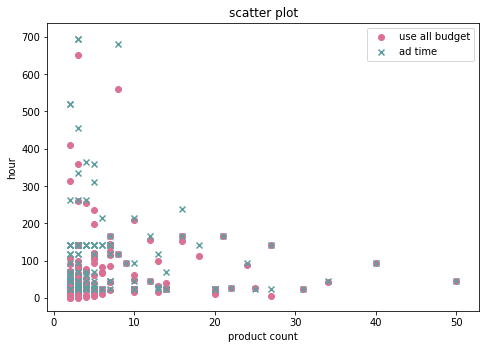

In [337]:
# aa_n['ad_set_id'] = aa_n['ad_set_id'].astype(str)
# n['ad_set_id'] = n['ad_set_id'].astype(str)
# x = pd.merge(aa_n, n, on='ad_set_id')
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x['pid'], x['over'], marker = 'o', color='palevioletred', label = 'use all budget')
ax.scatter(x['pid'], x['hr_diff'], marker = 'x', color='cadetblue', label = 'ad time')
ax.set_xlabel('product count')
ax.set_ylabel('hour')
ax.set_title('scatter plot')
plt.legend()
plt.show()


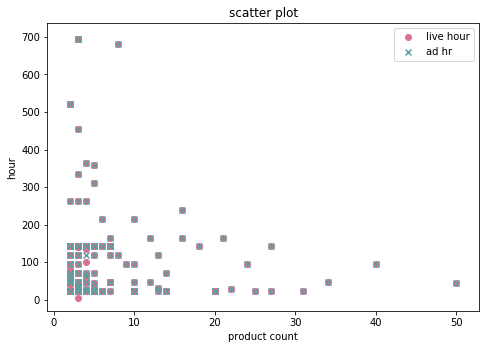

In [390]:
# aa_n['ad_set_id'] = aa_n['ad_set_id'].astype(str)
# n['ad_set_id'] = n['ad_set_id'].astype(str)
# x = pd.merge(aa_n, n, on='ad_set_id')


import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x['pid'], x['live_hr'], marker = 'o', color='palevioletred', label = 'live hour')
ax.scatter(x['pid'], x['ad_hr'], marker = 'x', color='cadetblue', label = 'ad hr')
ax.set_xlabel('product count')
ax.set_ylabel('hour')
ax.set_title('scatter plot')
plt.legend()
plt.show()


In [420]:
x['subtract'] = x['ad_hr'] - x['live_hr']

In [424]:
x[x['subtract'] > 0]

,ad_set_id,total_budget,total_point,live_hr,ad_hr,prop,pid,subtract
9,38907,65000,65000,310,311,0.996785,5,1
25,43008,21000,21000,139,143,0.972028,3,4
28,43032,35000,35000,134,143,0.937063,4,9
60,43705,18000,18000,141,143,0.986014,3,2
64,44299,24000,0,100,119,0.840336,4,19
73,44918,15000,0,78,95,0.821053,2,17
74,44919,15000,0,78,95,0.821053,2,17
89,46102,9000,9000,40,47,0.851064,2,7
95,46219,6000,6000,46,47,0.978723,2,1
103,46574,6000,6000,43,46,0.934783,3,3


In [428]:
# aa_one['ad_set_id'] = aa_one['ad_set_id'].astype(str)
# one['ad_set_id'] = one['ad_set_id'].astype(str)
y = pd.merge(aa_one, one, on='ad_set_id')



In [430]:
x[x['subtract'] > 0].shape[0]/x.shape[0]

0.10526315789473684

In [439]:
x[x['subtract'] > 0].describe()

,total_budget,total_point,live_hr,ad_hr,prop,pid,subtract
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,18000.000000,14625.000000,76.750000,84.437500,0.858473,4.312500,7.687500
std,17944.358445,19262.658176,77.191968,76.416376,0.203400,6.117938,7.846177
min,4000.000000,0.000000,5.000000,23.000000,0.217391,2.000000,1.000000
25%,6000.000000,4000.000000,22.000000,23.000000,0.835515,2.000000,1.000000
50%,12000.000000,6000.000000,44.500000,47.000000,0.946792,3.000000,3.500000
75%,21750.000000,18750.000000,108.500000,125.000000,0.960398,3.250000,17.000000
max,65000.000000,65000.000000,310.000000,311.000000,0.996785,27.000000,21.000000


In [440]:
# y['subtract'] = y['ad_hr'] - y['live_hr']
y[y['subtract'] > 0].describe()

,total_budget,total_point,live_hr,ad_hr,prop,pid,subtract
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.0,126.000000
mean,10777.777778,6330.746032,90.714286,98.119048,0.860110,1.0,7.404762
std,13312.784165,8975.107983,85.936242,85.930354,0.181807,0.0,6.327310
min,2000.000000,0.000000,1.000000,23.000000,0.043478,1.0,1.000000
25%,3000.000000,2000.000000,22.000000,23.000000,0.845341,1.0,2.000000
50%,7000.000000,3041.500000,69.500000,71.000000,0.923077,1.0,6.000000
75%,14000.000000,7000.000000,135.750000,143.000000,0.970337,1.0,11.000000
max,100000.000000,66000.000000,499.000000,503.000000,0.997015,1.0,23.000000


In [431]:
y[y['subtract']>0].shape[0]/y.shape[0]

0.2889908256880734

In [441]:
y[y['subtract'] > 0]

,ad_set_id,total_budget,total_point,live_hr,ad_hr,prop,pid,subtract
6,33475,66000,66000,499,503,0.992048,1,4
8,34036,21000,11375,464,479,0.968685,1,15
9,35899,18000,18000,404,407,0.992629,1,3
11,37793,15000,685,334,335,0.997015,1,1
15,39812,36000,36000,273,274,0.996350,1,1
...,...,...,...,...,...,...,...,...
400,47095,2000,2000,22,24,0.916667,1,2
402,47109,2000,2000,3,23,0.130435,1,20
404,47120,2000,2000,19,23,0.826087,1,4
405,47127,2000,83,1,23,0.043478,1,22


In [433]:
x.shape

(152, 8)

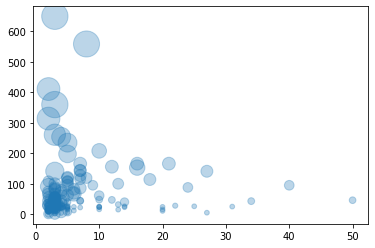

In [325]:
plt.scatter(x['pid'], x['over'], alpha=0.3,
            cmap='viridis')
plt.xlabel('product count per ad set')
plt.ylabel('')

In [327]:
x.to_csv('x.csv', index=False)

In [222]:
bid_click[bid_click['ad_set_id'] == '47183']['count'].sum()

20

In [224]:
bid_click[bid_click['ad_set_id'] == '47183']['bidxClick'].sum()

1000

In [223]:
bid_click[bid_click['ad_set_id'] == '47183']

,hour,ad_set_id,bid_price,count,bidxClick
148,2021013100,47183,50,1,50
3722,2021013123,47183,50,1,50
7847,2021013101,47183,50,2,100
8324,2021013115,47183,50,1,50
8466,2021013109,47183,50,1,50
9399,2021013113,47183,50,1,50
10241,2021013118,47183,50,1,50
13140,2021013107,47183,50,1,50
16964,2021013121,47183,50,5,250
18105,2021013119,47183,50,1,50


In [39]:
imp_click_set = {}

start_date_list = dw['ad_set_start_date'].unique()
for start_date in start_date_list:
    ad_set_list = dw[dw['ad_set_start_date'] == start_date]['ad_set_id'].unique()
    ad_set_ids = ','.join('\'' + str(i) + '\'' for i in ad_set_list)
    start_date = str(start_date)
    print('start ' + start_date)
    print('count of ' + str(len(ad_set_list)))
    q1 = f"""
    SELECT ad_set_id,
           ad_set_product_id,
           count(*)
    FROM bun_log_db.api_event_type_click_ad
    WHERE YEAR||'-'||MONTH||'-'||DAY BETWEEN {start_date} AND '2021-01-31'
      AND ref_source = 'sa'
      AND ad_set_id IN ({ad_set_ids})
    GROUP BY 1, 2;
    """
    click_cnt = pd.read_sql(q1, con=bun_dw)
    print('got click data')

    q2 = f"""
    SELECT ad_set_id,
           ad_set_product_id,
           count(*)
    FROM bun_log_db.api_event_type_impression_ad
    WHERE YEAR||'-'||MONTH||'-'||DAY BETWEEN {start_date} AND '2021-01-31'
      AND ref_source = 'sa'
      AND page_id = '검색결과'
      AND ad_set_id IN ({ad_set_ids})
    GROUP BY 1, 2;
    """
    imp_cnt = pd.read_sql(q2, con=bun_dw)
    print('got imp data')
    print(imp_cnt.head(5))
    
    click_cnt['ad_set_id'] = click_cnt['ad_set_id'].astype(str)
    click_cnt['ad_set_product_id'] = click_cnt['ad_set_product_id'].astype(str)
    imp_cnt['ad_set_id'] = imp_cnt['ad_set_id'].astype(str)
    click_cnt['ad_set_product_id'] = click_cnt['ad_set_product_id'].astype(str)
    temp_df = pd.merge(click_cnt, imp_cnt, on=['ad_set_id', 'ad_set_product_id'], how='outer')
    imp_click_set[start_date] = temp_df

    print('done with ' + start_date)

start 2021-01-07
count of 1
got click data


KeyboardInterrupt: 

In [37]:
click_cnt

,ad_set_id,ad_set_product_id,count
0,30958,88649,139


In [7]:
p_cnt_per_ad_set = dw.groupby('ad_set_id', as_index=False)['pid'].nunique()

In [9]:
p_cnt_per_ad_set.columns = ['ad_set_id', 'p_cnt']

In [11]:
p_cnt_per_ad_set.sort_values('p_cnt', ascending=False)

,ad_set_id,p_cnt
406,46643,50
270,45027,40
340,46153,34
493,46924,31
48,42950,27
...,...,...
218,43679,1
217,43666,1
216,43661,1
215,43625,1


In [14]:
p_cnt_per_ad_set.to_csv('p_cnt_per_ad_set.csv', index=False)

In [15]:
p_cnt_per_ad_set.groupby('p_cnt').size()

p_cnt
1     436
2      32
3      39
4      16
5      17
6       5
7       9
8       2
9       1
10      7
12      2
13      3
14      3
16      2
18      1
20      3
21      1
22      1
24      1
25      1
27      2
31      1
34      1
40      1
50      1
dtype: int64